In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def power_law(wl, A, k, C):
    return A*(wl/(1+z))**k+C

def graph_more():
    plt.axvline(6563, label=r'H$\alpha$', color='red', linewidth=0.5)
    plt.axvline(4861, label=r'H$\beta$', color='cyan', linewidth=0.5)
    plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.legend(loc=1); plt.show()

z = 0.0146

In [44]:
pl_params

array([-1.01515889e-26,  2.70195283e+00,  9.66365872e-16])

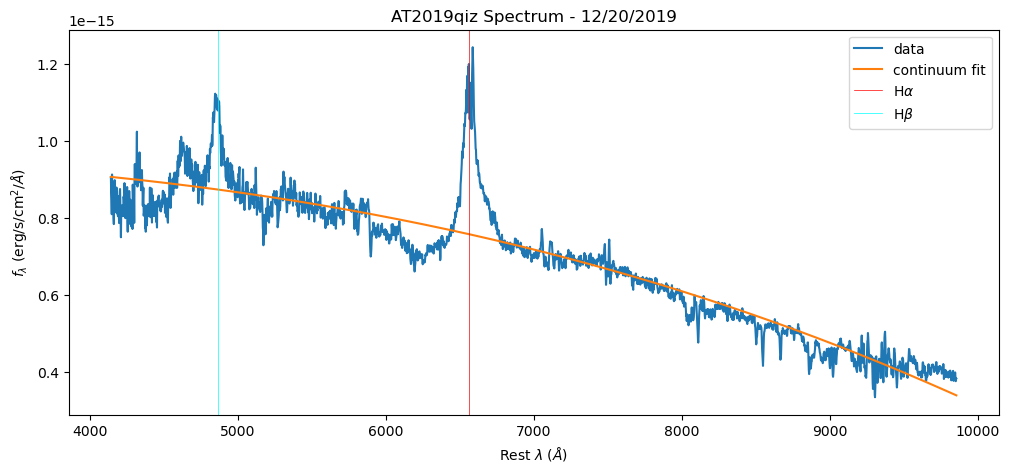

In [45]:
wl, flux = np.loadtxt('../E1spec.txt', unpack=True)

params = np.array([-4.24299309e-12,  2.26376993e-04,  4.25147743e-12])
continuum = curve_fit(power_law, wl, flux, p0=params, maxfev=10000)
pl_params = continuum[0]

plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux, label='data')
plt.plot(wl/(1+z), power_law(wl, *pl_params), label='continuum fit')
#plt.xlim(5700, 6300)
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)')
plt.title('AT2019qiz Spectrum - 12/20/2019')
graph_more()

In [46]:
wl_1 = np.argmin(np.abs(wl/(1+z) - 5200)); wl_2 = np.argmin(np.abs(wl/(1+z) - 6000))
wl_3 = np.argmin(np.abs(wl/(1+z) - 7000)); wl_4 = np.argmin(np.abs(wl/(1+z) - 9000))
cut_range = np.concatenate((np.arange(0, wl_1), np.arange(wl_2, wl_3), np.arange(wl_4, len(wl)-1)))

wl_cut = np.delete(wl, cut_range); flux_cut = np.delete(flux, cut_range)

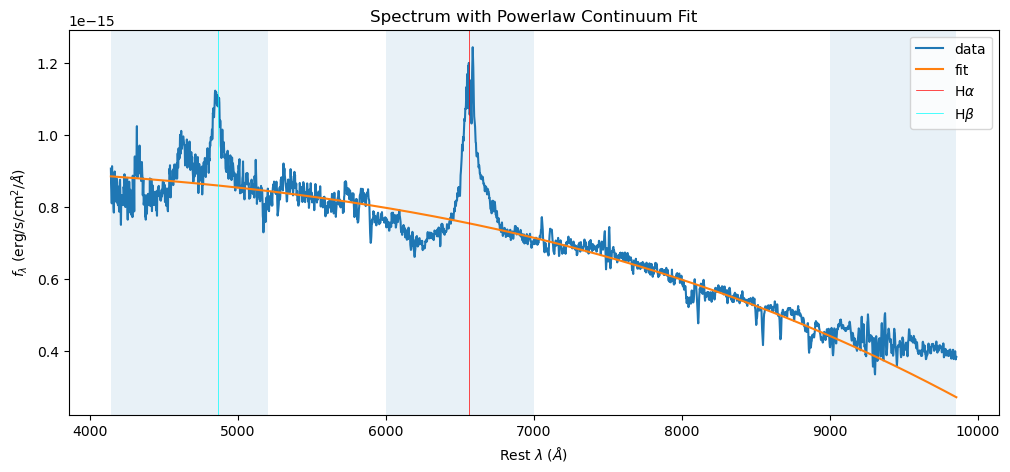

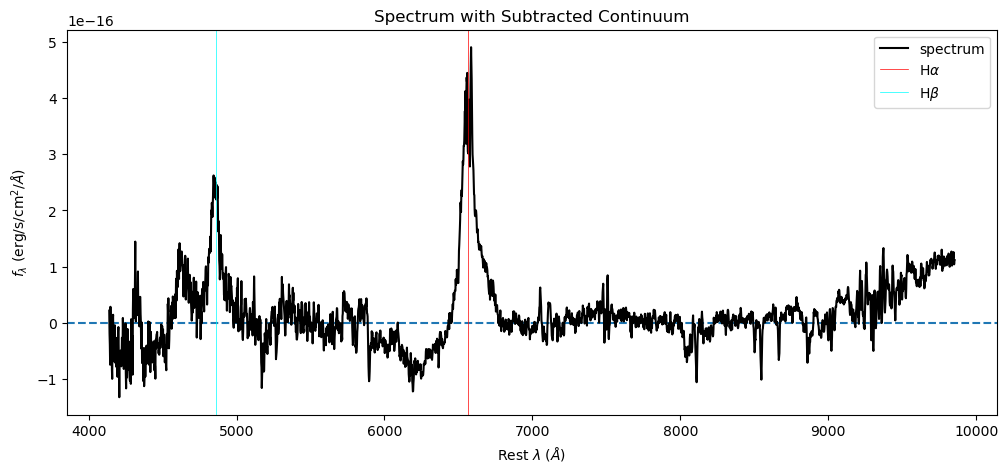

In [47]:
continuum = curve_fit(power_law, wl_cut, flux_cut, p0=pl_params, maxfev=int(1e5))

plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux, label='data'); plt.plot(wl/(1+z), power_law(wl, *continuum[0]), label='fit')
plt.axvspan(wl[0]/(1+z), wl[wl_1]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_2]/(1+z), wl[wl_3]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_4]/(1+z), wl[-1]/(1+z), alpha=0.1)
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)'); plt.title('Spectrum with Powerlaw Continuum Fit')
graph_more()

plt.figure(figsize=(12, 5))
plt.axhline(0, linestyle='--')
plt.plot(wl/(1+z), flux - power_law(wl, *continuum[0]), color='black', label='spectrum')
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)')
plt.title('Spectrum with Subtracted Continuum')
graph_more()

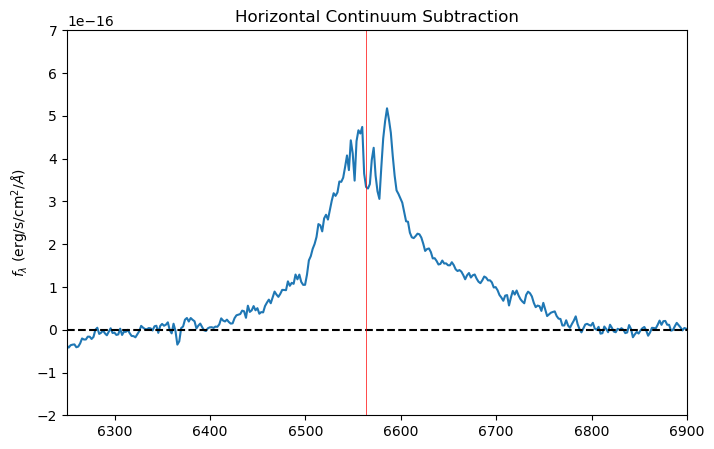

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(wl/(1+z), flux - 7.25e-16, label='data')
plt.axhline(0, ls='--', c='k'); plt.axvline(6563, lw=0.5, c='r')
plt.xlim(6250, 6900); plt.ylim(-2e-16, 7e-16)
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)')
plt.title('Horizontal Continuum Subtraction'); plt.show()